## Understanding and splitting qptiff image into individual marker images

- There are 3 series in the R1 qptiff. The first is where all the data is, not sure what the other two are...
- There are 44 pages in a series 1, these are probably the individual markers
    - The marker name is in the 'Biomarker' tag of 'ImageDescription
    - The image files are 1-Dimensional
- The 5 levels are resolution

### Spliting the regions

- Looks like the regions are 7 x 7 stitched tiles. Not sure how to tarnslate the tile metadata to regions....
    - though, the sections seem pretty cleanly cut at 10000 pixels
        - will use dimensions 7488 (all y) x 10020
    - and the cuts seems consistently spaced between samples

In [1]:
import tifffile as tff
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
from cv2 import imwrite
from PIL import Image
import pickle as pk

In [2]:
raw_ome = '../Data/20220311 Reactive LN_R1.qptiff'
# raw_ome = '../Data/20220312 Kikushi LN_K1.qptiff'

In [3]:
tifim = tff.TiffFile(raw_ome)
first_level = tifim.series[0].levels[0]
first_page = tifim.series[0].pages[0]


### Splitting R1 images

In [2]:
raw_ome = '../Data/R1/20220311_Reactive_LN_R1.qptiff'
tifim = tff.TiffFile(raw_ome)
nregion = 3

In [4]:
# Making individual marker images
# x-size = 10026
# y-size = (all)

for p in tifim.series[0].pages:
    tif_xml = p.tags['ImageDescription'].value
    tif_meta = ET.XML(tif_xml)
    marker = tif_meta.find("Biomarker").text
    print(marker)
    p_im = p.asarray()
    for i in range(nregion):
        out = p_im[ : , (10026*i):(10026*i + 10026)]
        imwrite('../Data/R1/region{}/{}.tif'.format(i+1, marker), out)

DAPI
IRF4
CLEC9A
IRF8
TCF4
CD123
BCL-6
FOXP3
Ki67
CD25
CD40
CD10
CD11c
PAX-5
PD-1
CD1c
BCL-2
CD134
CD68
CD69
CD11b
ICOS
CD163
MPO
CD30
CD5
Podoplanin
HLA-DR
CD20
CD8
CD138
CD23
Fascin
CD45
CD45RA
Mac2Gal3
CD4
Granzyme B
CD21
CD3e
CD15
CD34
CD31
Vimentin


In [3]:
# Preparing image for input to MESMER
#   Using DAPI, Vimentin, and CD45
dapi = Image.open("../Data/R1/region1/markers/DAPI.tif")
dapi = np.array(dapi)
vim = Image.open("../Data/R1/region1/markers/Vimentin.tif")
vim = np.array(vim)
cd45 = Image.open("../Data/R1/region1/markers/CD45.tif")
cd45 = np.array(cd45)

membrane = vim + cd45
reg1_seg_input = np.stack((dapi, membrane), axis=2)
# seg_input = np.expand_dims(seg_input, axis=0)
# with open("../Data/R1/region1/forMesmer/input.pckl", "wb") as f:
#     pk.dump(seg_input, f)

In [5]:
# making images for the other regions
#    Region 2
dapi = Image.open("../Data/R1/region2/DAPI.tif")
dapi = np.array(dapi)
vim = Image.open("../Data/R1/region2/Vimentin.tif")
vim = np.array(vim)
cd45 = Image.open("../Data/R1/region2/CD45.tif")
cd45 = np.array(cd45)

membrane = vim + cd45
reg2_seg_input = np.stack((dapi, membrane), axis=2)

    
#    Region 3
dapi = Image.open("../Data/R1/region3/DAPI.tif")
dapi = np.array(dapi)
vim = Image.open("../Data/R1/region3/Vimentin.tif")
vim = np.array(vim)
cd45 = Image.open("../Data/R1/region3/CD45.tif")
cd45 = np.array(cd45)

membrane = vim + cd45
reg3_seg_input = np.stack((dapi, membrane), axis=2)


In [7]:
# seg_input = np.expand_dims(seg_input, axis=0)
R1_seg_input = np.stack((reg1_seg_input, reg2_seg_input, reg3_seg_input), axis=0)
# seg_input = np.expand_dims(seg_input, axis=0)
with open("../Data/R1/Mesmer_input.pckl", "wb") as f:
    pk.dump(R1_seg_input, f)

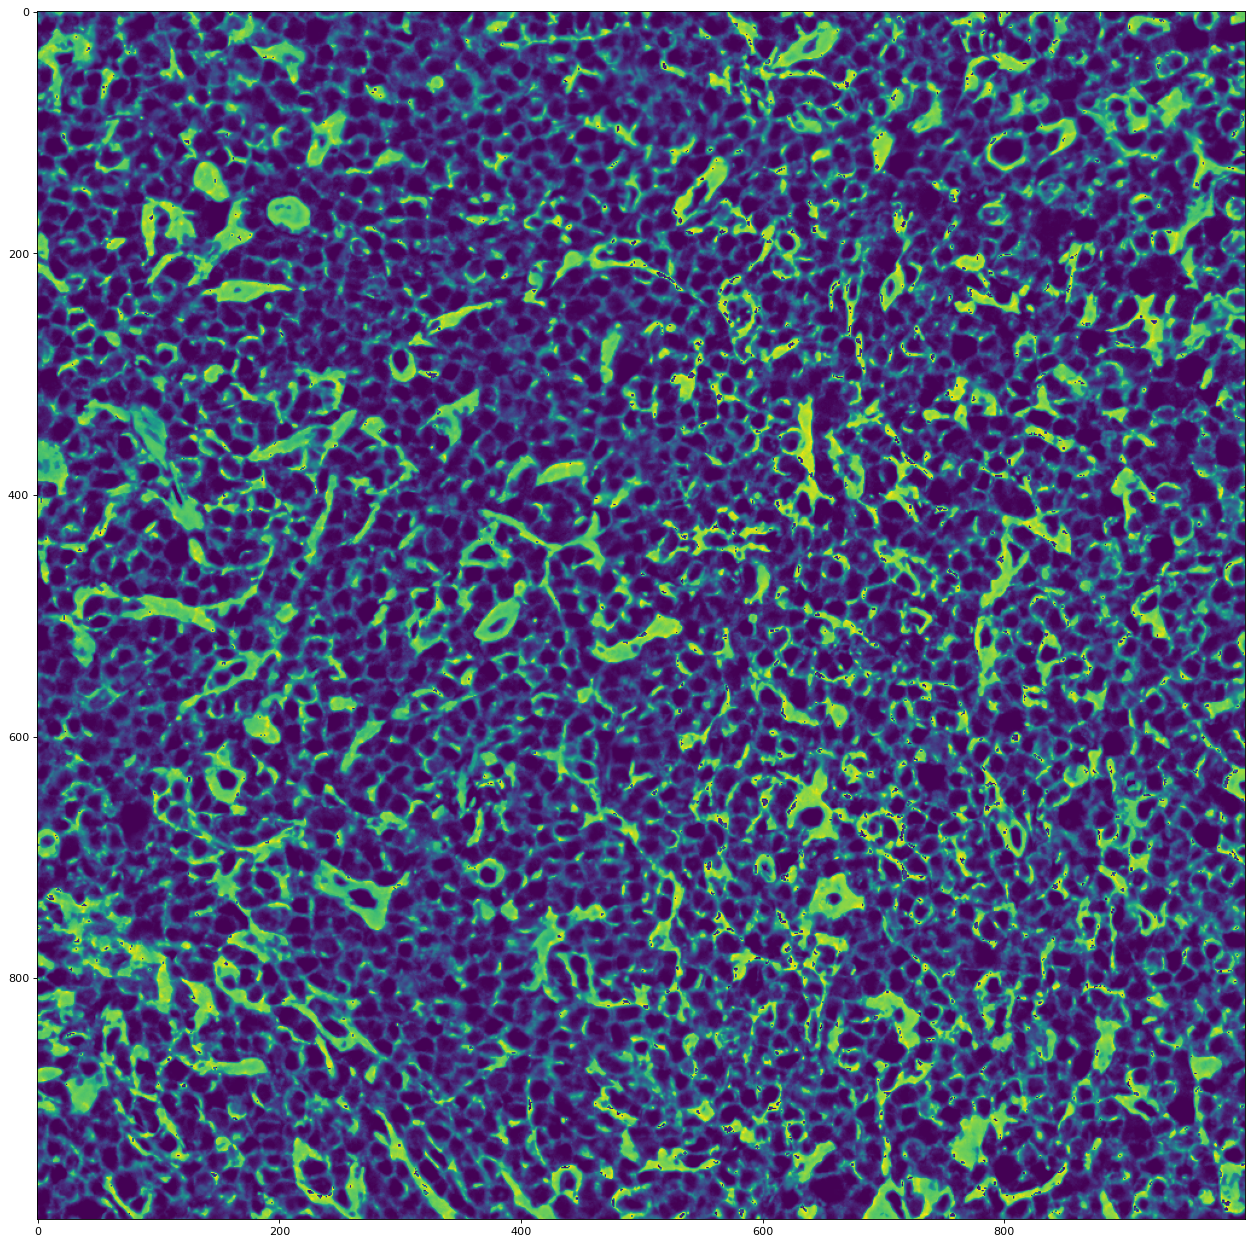

In [17]:
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(membrane[1000:2000, 1000:2000])

In [5]:
# Making regional test images stacked with all markers

for i_region in range(nregion):
    arrays = []
    for p in tifim.series[0].pages:
        tif_xml = p.tags['ImageDescription'].value
        tif_meta = ET.XML(tif_xml)
        # print(tif_meta.find("Biomarker").text)
        # marker = tif_meta.find("Biomarker").text
        # markers.append(marker)
        p_im = p.asarray()
        out = p_im[ : , (10026*i_region):(10026*i_region + 10026)]
        # out = p_im[2000:3000,2000:3000] # cropping image down for testing
        arrays.append(out)
    out = np.stack(arrays, axis=0)
    out = np.expand_dims(out, axis=1)
    print(out.shape)
    with tff.TiffWriter('../Data/CellSeg_input/regions/R1_reg{}_input.tif'.format(i_region+1)) as tif:
        tif.write(out)

DAPI
IRF4
CLEC9A
IRF8
TCF4
CD123
BCL-6
FOXP3
Ki67
CD25
CD40
CD10
CD11c
PAX-5
PD-1
CD1c
BCL-2
CD134
CD68
CD69
CD11b
ICOS
CD163
MPO
CD30
CD5
Podoplanin
HLA-DR
CD20
CD8
CD138
CD23
Fascin
CD45
CD45RA
Mac2Gal3
CD4
Granzyme B
CD21
CD3e
CD15
CD34
CD31
Vimentin
(44, 1, 7488, 10026)
DAPI
IRF4
CLEC9A
IRF8
TCF4
CD123
BCL-6
FOXP3
Ki67
CD25
CD40
CD10
CD11c
PAX-5
PD-1
CD1c
BCL-2
CD134
CD68
CD69
CD11b
ICOS
CD163
MPO
CD30
CD5
Podoplanin
HLA-DR
CD20
CD8
CD138
CD23
Fascin
CD45
CD45RA
Mac2Gal3
CD4
Granzyme B
CD21
CD3e
CD15
CD34
CD31
Vimentin
(44, 1, 7488, 10026)
DAPI
IRF4
CLEC9A
IRF8
TCF4
CD123
BCL-6
FOXP3
Ki67
CD25
CD40
CD10
CD11c
PAX-5
PD-1
CD1c
BCL-2
CD134
CD68
CD69
CD11b
ICOS
CD163
MPO
CD30
CD5
Podoplanin
HLA-DR
CD20
CD8
CD138
CD23
Fascin
CD45
CD45RA
Mac2Gal3
CD4
Granzyme B
CD21
CD3e
CD15
CD34
CD31
Vimentin
(44, 1, 7488, 10026)


In [22]:
# Making image stacked 1 marker and DAPI, 1 region
i_region = 0
dapi_im = tifim.series[0].pages[0].asarray()
dapi_im = dapi_im[ : , (10026*i_region):(10026*i_region + 10026)]
for p in tifim.series[0].pages:
    tif_xml = p.tags['ImageDescription'].value
    tif_meta = ET.XML(tif_xml)
    marker = tif_meta.find("Biomarker").text
    markers.append(marker)
    p_im = p.asarray()
    crop = p_im[ : , (10026*i_region):(10026*i_region + 10026)]
    out = np.stack([crop, dapi_im], axis=2)
    # imwrite("../Data/R1/region1/{}.tif".format(marker), out)
    with tff.TiffWriter("../Data/R1/region1/{}-stacked.tif".format(marker)) as tif:
        tif.write(out)

### Splitting K1 images

For export to MESMER, going to use the whole image

In [6]:
raw_ome = '../Data/20220312_Kikushi_LN_K1.qptiff'
tifim = tff.TiffFile(raw_ome)
nregion = 4

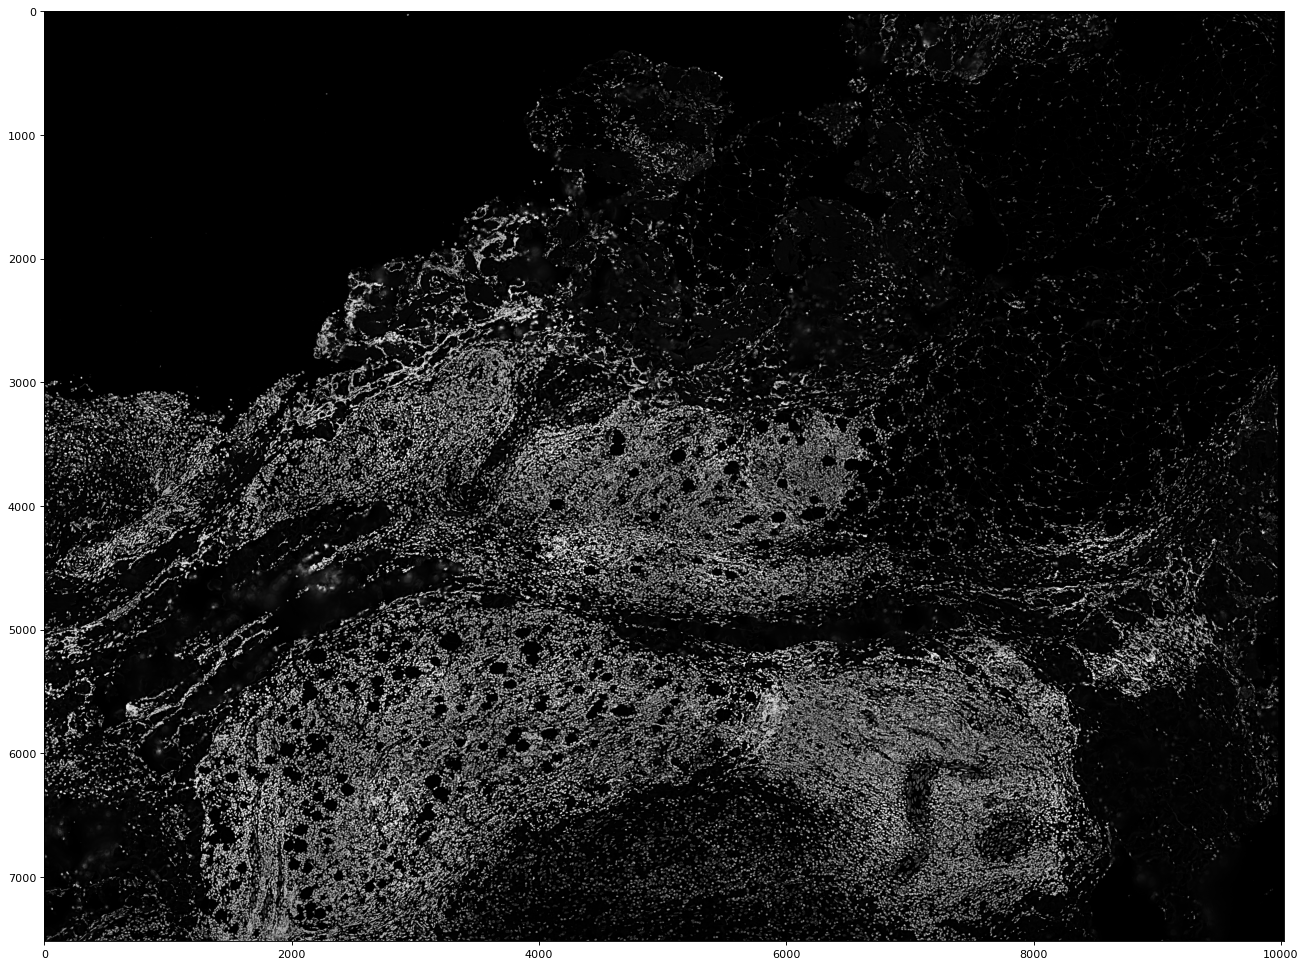

In [11]:
plt.figure(figsize=(20, 20), dpi=80)
# test = tifim.series[0].pages[0].asarray()
plt.imshow(test[7520: , 0:10026], cmap='gray')

In [10]:
test.shape

(15040, 30080)

In [7]:
tifim.series[0].pages[0].shape

(15040, 30080)

In [12]:
# x-size = 10026
# y-size = 7520

for p in tifim.series[0].pages:
    tif_xml = p.tags['ImageDescription'].value
    tif_meta = ET.XML(tif_xml)
    marker = tif_meta.find("Biomarker").text
    print(marker)
    p_im = p.asarray()
    for i in range(nregion):
        if i < 3:
            out = p_im[ 0:7520 , (10026*i):(10026*i + 10026)]
            imwrite('../Data/K1/region{}/{}.tif'.format(i+1, marker), out)
        else:
            out = p_im[ 7520: , 0:10026]
            imwrite('../Data/K1/region{}/{}.tif'.format(i+1, marker), out)

DAPI
IRF4
CLEC9A
IRF8
TCF4
CD123
BCL-6
FOXP3
Ki67
CD25
CD40
CD10
CD11c
PAX-5
PD-1
CD1c
BCL-2
CD134
CD68
CD69
CD11b
ICOS
CD163
MPO
CD30
CD5
Podoplanin
HLA-DR
CD20
CD8
CD138
CD23
Fascin
CD45
CD45RA
Mac2Gal3
CD4
Granzyme B
CD21
CD3e
CD15
CD34
CD31
Vimentin


In [8]:
for i_region in range(nregion):
    arrays = []
    for p in tifim.series[0].pages:
        tif_xml = p.tags['ImageDescription'].value
        tif_meta = ET.XML(tif_xml)
        p_im = p.asarray()
        if i_region < 3:
            out = p_im[ 0:7520 , (10026*i_region):(10026*i_region + 10026)]
            arrays.append(out)
        else:
            out = p_im[ 7520: , 0:10026]
            arrays.append(out)
    out = np.stack(arrays, axis=0)
    out = np.expand_dims(out, axis=1)
    print(out.shape)
    with tff.TiffWriter('../Data/CellSeg_input/regions/K1_reg{}_input.tif'.format(i_region+1)) as tif:
        tif.write(out)

(44, 1, 7520, 10026)
(44, 1, 7520, 10026)
(44, 1, 7520, 10026)
(44, 1, 7520, 10026)


In [16]:
k1_images = []
for r in range(1,5):
    dapi = Image.open("../Data/K1/region{}/DAPI.tif".format(r))
    dapi = np.array(dapi)
    vim = Image.open("../Data/K1/region{}/Vimentin.tif".format(r))
    vim = np.array(vim)
    cd45 = Image.open("../Data/K1/region{}/CD45.tif".format(r))
    cd45 = np.array(cd45)

    membrane = vim + cd45
    outline = np.stack((dapi, membrane), axis=2)
    print(outline.shape)
    k1_images.append(outline)
k1_stack = np.stack(k1_images, axis=0)
print(k1_stack.shape)

(7520, 10026, 2)
(7520, 10026, 2)
(7520, 10026, 2)
(7520, 10026, 2)
(4, 7520, 10026, 2)


In [17]:
with open("../Data/K1_Mesmer_input.pckl", "wb") as f:
    pk.dump(k1_stack, f)

### Splitting K2 images

In [9]:
raw_ome = '../Data/20220316_Kikushi_LN_K2.qptiff'
tifim = tff.TiffFile(raw_ome)
nregion = 4

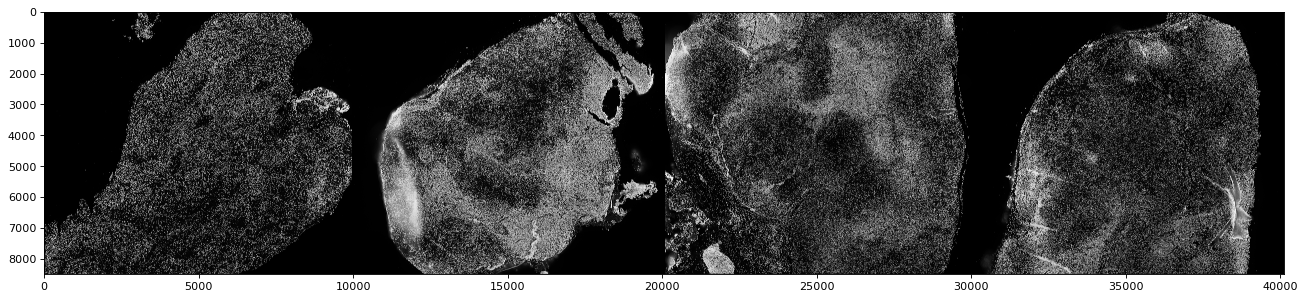

In [23]:
plt.figure(figsize=(20, 20), dpi=80)
test = tifim.series[0].pages[0].asarray()
plt.imshow(test, cmap='gray')

In [24]:
# x-size = 10032
# y-size = 7520

for p in tifim.series[0].pages:
    tif_xml = p.tags['ImageDescription'].value
    tif_meta = ET.XML(tif_xml)
    marker = tif_meta.find("Biomarker").text
    print(marker)
    p_im = p.asarray()
    for i in range(nregion):
        out = p_im[ : , (10031*i):(10031*i + 10031)]
        imwrite('../Data/K2/region{}/{}.tif'.format(i+1, marker), out)

DAPI
IRF4
CLEC9A
IRF8
TCF4
CD123
BCL-6
FOXP3
Ki67
CD25
CD40
CD10
CD11c
PAX-5
PD-1
CD1c
BCL-2
CD134
CD68
CD69
CD11b
ICOS
CD163
MPO
CD30
CD5
Podoplanin
HLA-DR
CD20
CD8
CD138
CD23
Fascin
CD45
CD45RA
Mac2Gal3
CD4
Granzyme B
CD21
CD3e
CD15
CD34
CD31
Vimentin


In [10]:
# for CellSeg
for i_region in range(nregion):
    arrays = []
    for p in tifim.series[0].pages:
        tif_xml = p.tags['ImageDescription'].value
        tif_meta = ET.XML(tif_xml)
        p_im = p.asarray()
        out = p_im[ : , (10031*i_region):(10031*i_region + 10031)]
        arrays.append(out)
    out = np.stack(arrays, axis=0)
    out = np.expand_dims(out, axis=1)
    print(out.shape)
    with tff.TiffWriter('../Data/CellSeg_input/regions/K2_reg{}_input.tif'.format(i_region+1)) as tif:
        tif.write(out)

(44, 1, 8496, 10031)
(44, 1, 8496, 10031)
(44, 1, 8496, 10031)
(44, 1, 8496, 10031)


In [2]:
k2_images = []
for r in range(1,5):
    dapi = Image.open("../Data/K2/region{}/DAPI.tif".format(r))
    dapi = np.array(dapi)
    vim = Image.open("../Data/K2/region{}/Vimentin.tif".format(r))
    vim = np.array(vim)
    cd45 = Image.open("../Data/K2/region{}/CD45.tif".format(r))
    cd45 = np.array(cd45)

    membrane = vim + cd45
    outline = np.stack((dapi, membrane), axis=2)
    print(outline.shape)
    k2_images.append(outline)
k2_stack = np.stack(k2_images, axis=0)
print(k2_stack.shape)

(8496, 10031, 2)
(8496, 10031, 2)
(8496, 10031, 2)
(8496, 10031, 2)
(4, 8496, 10031, 2)


In [3]:
with open("../Data/K2_Mesmer_input.pckl", "wb") as f:
    pk.dump(k2_stack, f)